# Z Stabilizer Distance-5 Measurement Code Circuit

![diagram](../images/Stim_exercise1.png)

## Install Stim

In [19]:
# Install Stim Packages
%pip install stim~=1.14
%pip install numpy~=1.0  # 1.0 instead of 2.0 for pymatching compatibility later
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import stim
print(stim.__version__)

1.15.0


## Make a circuit

stim.Circuit('''
    R 0 1 2 3 4
    X_ERROR(0.001) 0 1 2 3 4
    TICK
    CX 0 1 2 3
    DEPOLARIZE2(0.001) 0 1 2 3
    DEPOLARIZE1(0.001) 4
    TICK
    CX 2 1 4 3
    DEPOLARIZE1(0.001) 0
    DEPOLARIZE2(0.001) 2 1 4 3
    TICK
    X_ERROR(0.001) 1 3
    M 1 3
    DEPOLARIZE1(0.001) 0 2 4
    DETECTOR(1, 0) rec[-2]
    DETECTOR(3, 0) rec[-1]
    REPEAT 5 {
        R 1 3
        X_ERROR(0.001) 1 3
        DEPOLARIZE1(0.001) 0 2 4
        CX 0 1 2 3
        DEPOLARIZE2(0.001) 0 1 2 3
        DEPOLARIZE1(0.001) 4
        CX 2 1 4 3
        DEPOLARIZE1(0.001) 0
        DEPOLARIZE2(0.001) 2 1 4 3
        X_ERROR(0.001) 1 3
        M 1 3
        DEPOLARIZE1(0.001) 0 2 4
        SHIFT_COORDS(0, 1)
        DETECTOR(1, 0) rec[-2] rec[-4]
        DETECTOR(3, 0) rec[-1] rec[-3]
    }
    X_ERROR(0.001) 0 2 4
    M 0 2 4
    SHIFT_COORDS(0, 1)
    DETECTOR(1, 0) rec[-2] rec[-3] rec[-5]
    DETECTOR(3, 0) rec[-1] rec[-2] rec[-4]
    OBSERVABLE_INCLUDE(0) rec[-1]
''')


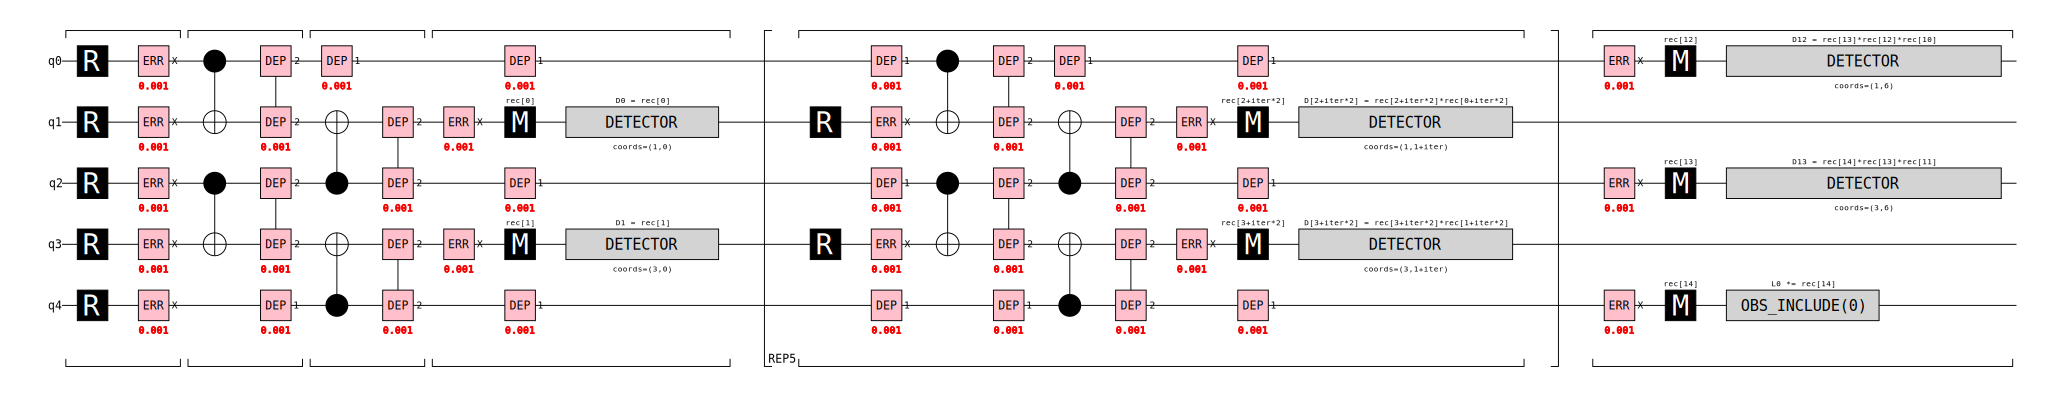

In [26]:
circuit = stim.Circuit("""
    R 0 1 2 3 4
    X_ERROR(0.001) 0 1 2 3 4
    TICK
    CX 0 1 2 3
    # depolarize : injects a uniformly random Pauli error
    DEPOLARIZE2(0.001) 0 1 2 3
    DEPOLARIZE1(0.001) 4 
    TICK
    CX 2 1 4 3
    DEPOLARIZE1(0.001) 0
    DEPOLARIZE2(0.001) 2 1 4 3 
    TICK
    X_ERROR(0.001) 1 3
    M 1 3
    DEPOLARIZE1(0.001) 0 2 4
    DETECTOR(1,0) rec[-2]
    DETECTOR(3,0) rec[-1]
    
    REPEAT 5{
        R 1 3
        X_ERROR(0.001) 1 3
        DEPOLARIZE1(0.001) 0 2 4
        CX 0 1 2 3
        DEPOLARIZE2(0.001) 0 1 2 3
        DEPOLARIZE1(0.001) 4
        CX 2 1 4 3
        DEPOLARIZE1(0.001) 0
        DEPOLARIZE2(0.001) 2 1 4 3
        X_ERROR(0.001) 1 3
        M 1 3
        DEPOLARIZE1(0.001) 0 2 4
        SHIFT_COORDS(0,1) # increase t of future detectors
        DETECTOR(1,0) rec[-2] rec[-4]
        DETECTOR(3,0) rec[-1] rec[-3]
    }
                       
    # finishing                  
    X_ERROR(0.001) 0 2 4
    M 0 2 4
    SHIFT_COORDS(0,1)
    DETECTOR(1,0) rec[-2] rec[-3] rec[-5]
    DETECTOR(3,0) rec[-1] rec[-2] rec[-4]
                       
    # Choose the measurement for observation
    OBSERVABLE_INCLUDE(0) rec[-1]
    """)
print(repr(circuit))
circuit.diagram('timeline-svg')